In [3]:
# 1. Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, MobileNet, VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# 2. Load and preprocess CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0  # Normalize to the [0, 1] range
y_train_full = to_categorical(y_train_full)
y_test = to_categorical(y_test)

In [5]:
# Split data into training and validation sets; avoid test set for hyperparameter tuning
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [6]:
# Model definition: ResNet50 fine-tuning (as a replacement for ResNet18)
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze the pretrained layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [7]:
# Model definition: MobileNet fine-tuning
def create_mobilenet_model():
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze pretrained layers
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [8]:
# Model definition: VGG16 fine-tuning
def create_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

In [9]:
# Define models to train and fine-tune
models = {
    "ResNet50": create_resnet50_model(),
    "MobileNet": create_mobilenet_model(),
    "VGG16": create_vgg16_model()
}


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 34s 0us/step


/var/folders/3n/cyszcj411bncs7g0h76m8wlh0000gn/T/ipykernel_48918/3755381096.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [11]:
# Training and tuning
histories = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...\n")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        epochs=30, validation_data=(x_val, y_val))
    histories[model_name] = history


Training ResNet50...

Epoch 1/30
  2/625 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.0898 - loss: 4.4338

/Users/lijingyi/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.0980 - loss: 2.3932 - val_accuracy: 0.0934 - val_loss: 2.3028
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.0972 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.1037 - loss: 2.3026 - val_accuracy: 0.0933 - val_loss: 2.3028
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.1022 - loss: 2.3026 - val_accuracy: 0.0933 - val_loss: 2.3027
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accurac

625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2134 - loss: 2.1455 - val_accuracy: 0.2298 - val_loss: 2.1396
Epoch 21/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2167 - loss: 2.1471 - val_accuracy: 0.2292 - val_loss: 2.1375
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2164 - loss: 2.1480 - val_accuracy: 0.2315 - val_loss: 2.1349
Epoch 23/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2162 - loss: 2.1494 - val_accuracy: 0.2288 - val_loss: 2.1389
Epoch 24/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2150 - loss: 2.1540 - val_accuracy: 0.2305 - val_loss: 2.1365
Epoch 25/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2163 - loss: 2.1501 - val_accuracy: 0.2309 - val_loss: 2.1342
Epoch 26/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.2194 - loss: 2.1448 - val_accuracy: 0.2337 - val_loss: 2.1334
Epoch 27/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2180 - loss: 2.1504 - val_

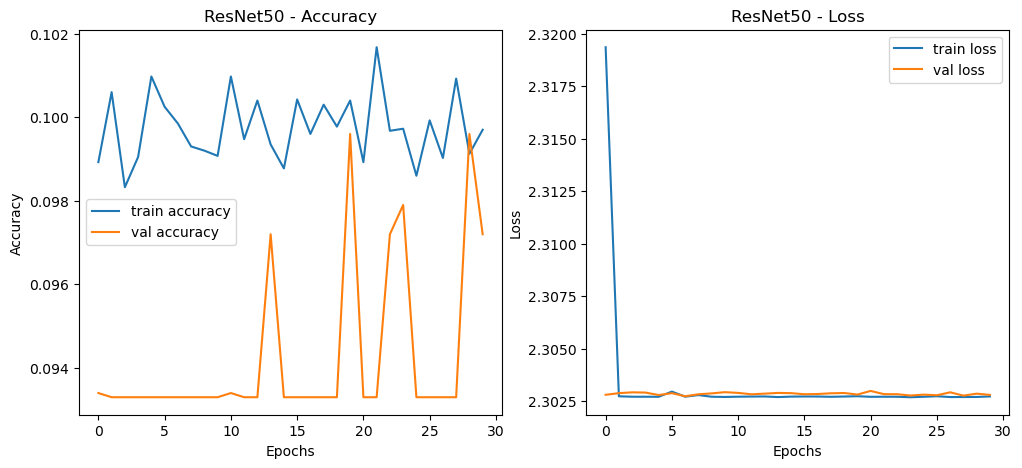

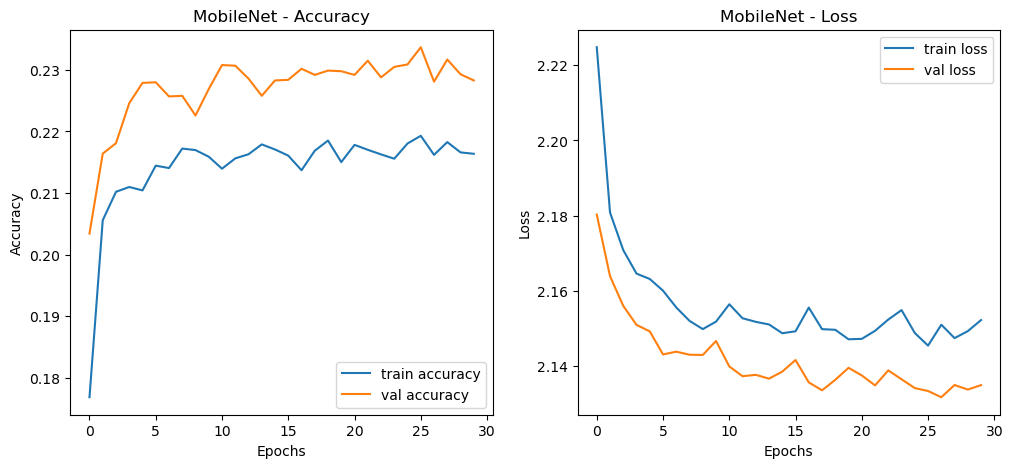

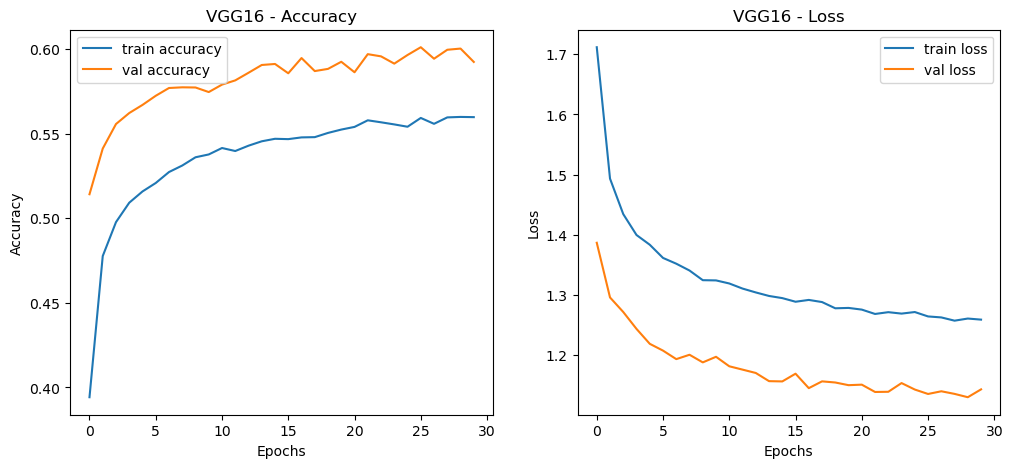

In [18]:
# Visualize training and validation accuracy and loss
def plot_training_history(histories):
    for model_name, history in histories.items():
        plt.figure(figsize=(12, 5))
        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy')
        plt.title(f'{model_name} - Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title(f'{model_name} - Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
        
# Plot training results
plot_training_history(histories)